In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\27572\Desktop\artdow.csv",encoding="gbk")

In [3]:
data

,序号,题目,作者,下载量,引用量
0,1,中国企业国际化的战略风险管理理论与实证研究,王小军,10718,43
1,2,图像与语言的转向——后形式主义、图像学与符号学,曹意强,5651,130
2,3,民族认同危机还是民族主义宣示?——亨廷顿《我们是谁》一书中的族际政治理论困境,郝时远,5489,46
3,4,地方记忆与身份呈现,曾澜,5454,28
4,5,师范生教师职业技能训练的探索与思考——以华中师范大学为例,洪早清,4829,37
...,...,...,...,...,...
1513,1514,关于理想未来的重估,鲁伟;何家欢;李欣怡;骆晶文;邢思琦;沈雯艳,12,0
1514,1515,关于“意象”素描教学的几点探索,黎权,12,0
1515,1516,黄纪苏：与“李安们”保持距离？,吴波,8,0
1516,1517,他寻找到了自己的精神家园,董国和,8,0


In [4]:
y = data.loc[:,['下载量']].values.tolist()

In [5]:
x = data.loc[:,['序号']].values.tolist()

In [6]:
y_use = np.log10(y)
x_use = np.log10(x)

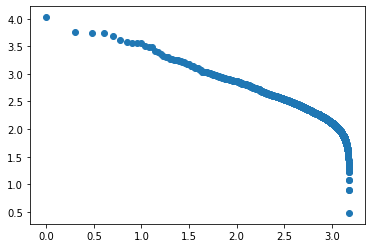

In [7]:
plt.scatter(x_use, y_use)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [9]:
lin_reg.fit(x_use, y_use)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lin_reg.coef_

array([[-0.83219471]])

In [11]:
lin_reg.intercept_

array([4.55851681])

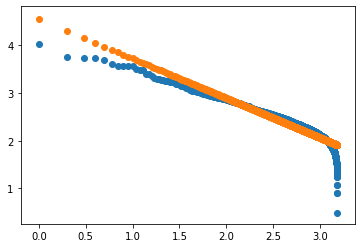

In [12]:
plt.scatter(x_use, y_use)
plt.scatter(x_use, lin_reg.predict(x_use))
plt.show()

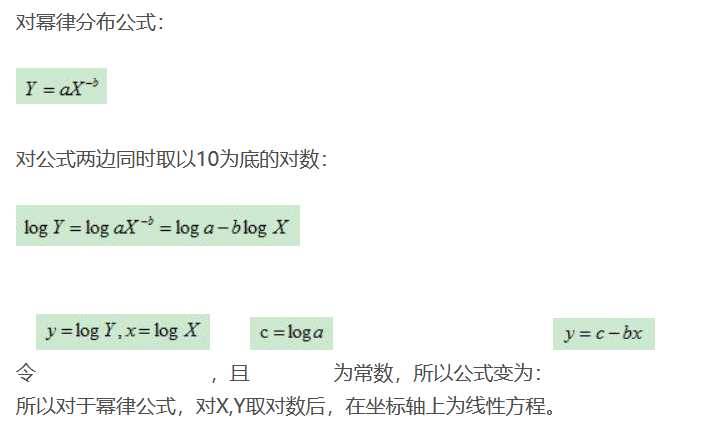

In [13]:
a = 10**lin_reg.intercept_

In [14]:
a

array([36184.01999104])

E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24459 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-

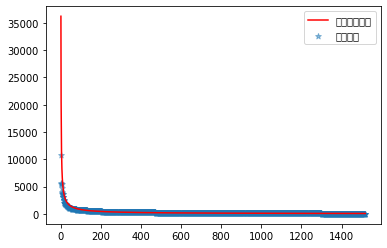

In [32]:
plt.scatter(x, y, alpha=0.5, marker='*', label='所有论文')
plt.plot(x, a*x**lin_reg.coef_, color='r', label='幂律拟合曲线')
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_use, y_use, random_state=666)

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.8560464093134275

In [21]:
from playML.metrics import mean_squard_error
mean_squard_error(y_test, lin_reg.predict(X_test))

0.01853274910615352

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lin_reg.predict(X_test))

0.01853274910615352